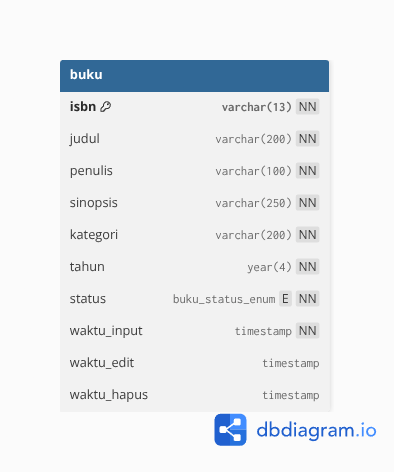

# Buku Service API Documentation

## Base URL
```
http://localhost:5003
```

## 1. GET / POST `/buku`
### Description
Retrieve all books or search books by keyword.

### Request Body (optional)
```json
{
  "s": "python",
  "nim": "123456"
}
```

- `s` → search keyword (judul / penulis)
- `nim` → student ID (for event tracking)

### Response
```json
[
  {
    "isbn": "978123",
    "judul": "Python Dasar",
    "penulis": "Guido",
    ...,
    "status": "tersedia"
  }
]
```

In [ ]:
import requests

url = "http://localhost:5003/buku"
payload = {"s": "python"}
print(requests.post(url, json=payload).json())

## 2. POST `/buku/tambah`
### Description
Add a new book.

### Request Body
```json
{
  "isbn": "978999",
  "judul": "Flask API",
  "penulis": "Ade",
  "kategori": "Programming",
  "sinopsis": "REST API dengan Flask",
  "tahun": 2024
}
```

### Response
```json
{"message": "Buku berhasil ditambahkan"}
```

In [ ]:
payload = {
    "isbn": "978999",
    "judul": "Flask API",
    "penulis": "Ade",
    "kategori": "Programming",
    "sinopsis": "REST API dengan Flask",
    "tahun": 2024
}
print(requests.post("http://localhost:5003/buku/tambah", json=payload).json())

## 3. POST `/buku/edit`
### Description
Update book information.

### Request Body
```json
{
  "isbn_original": "978999",
  "judul": "Flask API Advanced",
  "penulis": "Ade",
  "kategori": "Programming",
  "sinopsis": "Advanced REST API",
  "tahun": 2025
}
```

In [ ]:
payload = {
    "isbn_original": "978999",
    "judul": "Flask API Advanced",
    "penulis": "Ade",
    "kategori": "Programming",
    "sinopsis": "Advanced REST API",
    "tahun": 2025
}
print(requests.post("http://localhost:5003/buku/edit", json=payload).json())

## 4. DELETE `/buku/hapus`
### Description
Soft delete a book.

### Query Param
- `isbn`

### Example
```
DELETE /buku/hapus?isbn=978999
```

In [ ]:
print(requests.delete("http://localhost:5003/buku/hapus?isbn=978999").json())

## Redis Events
The API publishes events to Redis channel `book_events`:

| Event | Description |
|------|-------------|
| `book_added` | Book added |
| `book_updated` | Book updated |
| `book_deleted` | Book deleted |
| `book_searched` | Book searched |
| `book_status_updated` | Status sync to DB |

Subscribers update DB asynchronously.

## Notes
- Soft delete uses `waktu_hapus`
- Background Redis subscriber runs in daemon thread
- Errors return HTTP 500 with message